# Aims and objectives

## Briefing

**Context:** a loan default occurs when a borrower fails to make necessary payments on their debt. We want to investigate the factors that contribute to a borrower being unable to pay back their loan. We will use these findings to help determine whether to approve future borrowers.

**Task:** perform an EDA on the data set to uncover patterns and trends. Investigate what makes a 'good' borrower, versus a bad one. Create a profile which can determine the likelihood of a borrower being able to pay back a loan.

## Data dictionary

[Link](https://docs.google.com/spreadsheets/d/1zeaWMqX_PJRR5ikTsY-bV2Hw7pGArNpZhmlsvUjQI18/edit?gid=461848584#gid=461848584) to the data set.
* `credit_policy`: Whether the applicant meets basic credit criteria
* `purpose`: The stated purpose of the loan
* `int_rate`: The interest rate assigned to the loan
* `installment`: Monthly payment amount
* `log_annual_inc`: Natural log of the applicant's annual income
* `dti`: Debt-to-income ratio
* `fico`: FICO credit score
* `days_with_cr_line`: Length of credit history
* `revol_bal`: Revolving balance
* `revol_util`: Revolving utilisation rate
* `inq_last_6mths`: Number of credit inquiries in the last 6 months
* `delinq_2yrs`: Number of delinquencies in the past 2 years
* `pub_rec`: Number of derogatory public records
* `not_fully_paid`: Target variable (1 = unpaid, 0 = paid)

# ETL

## Initialisation

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data extraction and loading

In [3]:
df = pd.read_csv('Data_Loan.csv')

Let's have a look at the data.

In [4]:
df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


Rename columns with `.` to have an `_` separator instead.

In [5]:
df.columns = [c.replace(".", "_") for c in list(df.columns)]

Drop `credit_policy` because it's redundant.

In [6]:
if len(df['credit_policy'].unique()) == 1:
    df = df.drop(labels='credit_policy', axis=1)

Check for null values.

In [7]:
df.isna().any()

purpose              False
int_rate             False
installment          False
log_annual_inc       False
dti                  False
fico                 False
days_with_cr_line    False
revol_bal            False
revol_util           False
inq_last_6mths       False
delinq_2yrs          False
pub_rec              False
not_fully_paid       False
dtype: bool

Cast `not_fully_paid` as boolean.

In [8]:
df['not_fully_paid'] = df['not_fully_paid'].astype('bool')

Our data cleansing is complete.

In [9]:
df

,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,False
1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,False
2,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,False
3,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,False
4,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,debt_consolidation,0.0775,156.11,10.714418,5.00,762,2131.000000,1359,5.6,2,0,0,False
96,debt_consolidation,0.1154,329.95,12.323856,20.00,727,10292.000000,107501,44.8,2,0,0,False
97,all_other,0.0807,313.67,12.061047,0.72,787,8010.000000,3054,5.6,3,0,0,False
98,all_other,0.0807,297.99,11.407565,2.44,792,8717.958333,40384,9.6,0,0,0,False


## Data transformation

### Schema

Let's get a look at the type of values in our data set. It's a small data set so we don't need to decide on a threshold to display unique values. We can look at the unique values by eye and determine which columns are suitable for categorical modelling.

In [10]:
for col in df:
    unique_values = df[col].unique()
    #if len(unique_values) <= 10:
    print(f"Column: {col}")
    print("Unique values:", unique_values, "\n")

Column: purpose
Unique values: ['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational'] 

Column: int_rate
Unique values: [0.1189 0.1071 0.1357 0.1008 0.1426 0.0788 0.1496 0.1114 0.1134 0.1221
 0.1347 0.1324 0.0859 0.0714 0.0863 0.1103 0.1317 0.0894 0.1039 0.1513
 0.08   0.1355 0.1229 0.0901 0.0743 0.1375 0.0807 0.1028 0.087  0.1122
 0.0996 0.0933 0.0838 0.0775 0.1059 0.1596 0.1154 0.1343 0.1249 0.0964
 0.1186 0.1501 0.128  0.1091 0.1217 0.1533] 

Column: installment
Unique values: [829.1  228.22 366.86 162.34 102.92 125.13 194.02 131.22  87.19  84.12
 360.43 253.58 316.11  92.82 209.54 327.53  77.69 476.58 584.12 173.65
 188.02 474.42 339.6  484.85 320.19 159.03 155.38 255.43 156.84 275.38
  78.42 158.3  164.23 161.25 159.77  94.98  97.2  167.02 168.6  160.72
 178.69 323.98 813.65 112.87  94.88 398.69  39.6  678.08 401.37 205.45
 397.75 113.39  99.44 109.79  32.55 160.51 340.57 156.11 235.25 257.99
 225.37  80.26  84.   507.4

We'll organise the columns into the following: categorical and numerical.

**Categorical:** `purpose`, `inq_last_6mths`, `delinq_2yrs`, `pub_rec`, `not_fully_paid`

**Numerical:** `int_rate`, `installment`, `log_annual_inc`, `dti`, `fico`, `days_with_cr_line`, `revol_bal`

### Categorical

In [11]:
df_cat = pd.DataFrame([
    df['not_fully_paid'],
    df['purpose'],
    df['inq_last_6mths'].astype("category"),
    df['delinq_2yrs'].astype("category"),
    df['pub_rec'].astype("category")
]).T
df_cat

,not_fully_paid,purpose,inq_last_6mths,delinq_2yrs,pub_rec
0,False,debt_consolidation,0,0,0
1,False,credit_card,0,0,0
2,False,debt_consolidation,1,0,0
3,False,debt_consolidation,1,0,0
4,False,credit_card,0,1,0
...,...,...,...,...,...
95,False,debt_consolidation,2,0,0
96,False,debt_consolidation,2,0,0
97,False,all_other,3,0,0
98,False,all_other,0,0,0


### Numerical

In [12]:
df_num = pd.DataFrame([
    df['int_rate'],
    df['installment'],
    df['log_annual_inc'],
    df['dti'],
    df['days_with_cr_line'],
    df['revol_bal'],
    df['revol_util'],
    df['fico']
]).T
df_num

,int_rate,installment,log_annual_inc,dti,days_with_cr_line,revol_bal,revol_util,fico
0,0.1189,829.10,11.350407,19.48,5639.958333,28854.0,52.1,737.0
1,0.1071,228.22,11.082143,14.29,2760.000000,33623.0,76.7,707.0
2,0.1357,366.86,10.373491,11.63,4710.000000,3511.0,25.6,682.0
3,0.1008,162.34,11.350407,8.10,2699.958333,33667.0,73.2,712.0
4,0.1426,102.92,11.299732,14.97,4066.000000,4740.0,39.5,667.0
...,...,...,...,...,...,...,...,...
95,0.0775,156.11,10.714418,5.00,2131.000000,1359.0,5.6,762.0
96,0.1154,329.95,12.323856,20.00,10292.000000,107501.0,44.8,727.0
97,0.0807,313.67,12.061047,0.72,8010.000000,3054.0,5.6,787.0
98,0.0807,297.99,11.407565,2.44,8717.958333,40384.0,9.6,792.0


# EDA

In [13]:
sns.set_theme()

## Univariate analysis

### Statistics

Paid loans:

In [14]:
df_num[df['not_fully_paid'] == False].describe()

,int_rate,installment,log_annual_inc,dti,days_with_cr_line,revol_bal,revol_util,fico
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.098923,223.491778,11.092679,8.763889,4634.350000,17188.522222,33.861111,729.444444
std,0.022623,151.752754,0.711382,5.957935,2701.846875,23392.569414,26.019797,45.160416
min,0.071400,39.600000,8.987197,0.000000,1126.958333,0.000000,0.000000,627.000000
25%,0.080700,125.950000,10.626080,3.467500,2699.958333,3097.250000,13.775000,694.500000
50%,0.093300,160.615000,11.177233,7.985000,4182.000000,7059.000000,26.200000,727.000000
75%,0.112200,297.990000,11.512925,14.350000,5939.750000,21950.250000,51.950000,767.000000
max,0.159600,829.100000,12.429216,22.090000,14008.958330,128000.000000,93.400000,812.000000


Unpaid loans:

In [15]:
df_num[df['not_fully_paid'] == True].describe()

,int_rate,installment,log_annual_inc,dti,days_with_cr_line,revol_bal,revol_util,fico
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.119970,267.974000,10.958715,11.475000,3911.787500,15398.200000,50.250000,701.000000
std,0.019775,245.534131,0.783348,5.927931,1850.599204,19257.530734,23.900918,33.977116
min,0.096400,32.550000,9.615805,2.860000,1110.000000,269.000000,3.800000,667.000000
25%,0.107275,89.190000,10.474525,7.375000,2437.510417,3515.750000,35.550000,678.250000
50%,0.113800,162.620000,10.858259,11.660000,4565.458333,5499.000000,48.800000,684.500000
75%,0.132725,436.937500,11.410388,14.227500,5305.718750,20739.000000,72.725000,719.500000
max,0.150100,678.080000,12.269047,20.000000,6240.000000,56411.000000,76.800000,772.000000


Entire data set:

In [16]:
df_num.describe()

,int_rate,installment,log_annual_inc,dti,days_with_cr_line,revol_bal,revol_util,fico
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,0.101028,227.940000,11.079282,9.035000,4562.093750,17009.490000,35.50000,726.600000
std,0.023150,162.367679,0.715795,5.981154,2630.856598,22933.459903,26.17237,44.854873
min,0.071400,32.550000,8.987197,0.000000,1110.000000,0.000000,0.00000,627.000000
25%,0.080700,124.745000,10.596635,3.662500,2684.968750,3141.750000,14.30000,682.000000
50%,0.096400,160.615000,11.156251,8.310000,4253.979166,6678.500000,31.55000,722.000000
75%,0.115400,301.910000,11.512925,14.395000,5840.000000,22254.500000,53.65000,763.250000
max,0.159600,829.100000,12.429216,22.090000,14008.958330,128000.000000,93.40000,812.000000


**Comments**

The columns: `dti`, `installment`, `days_with_cr_line`, `revol_bal` and `revol_util` have a large `75% : max` ratio. This suggests the presence of outliers. We will get a better look at this in the next section.

### Data distribution

#### Categorical

Let's look at the distribution of categorical data based on `not_fully_paid`.

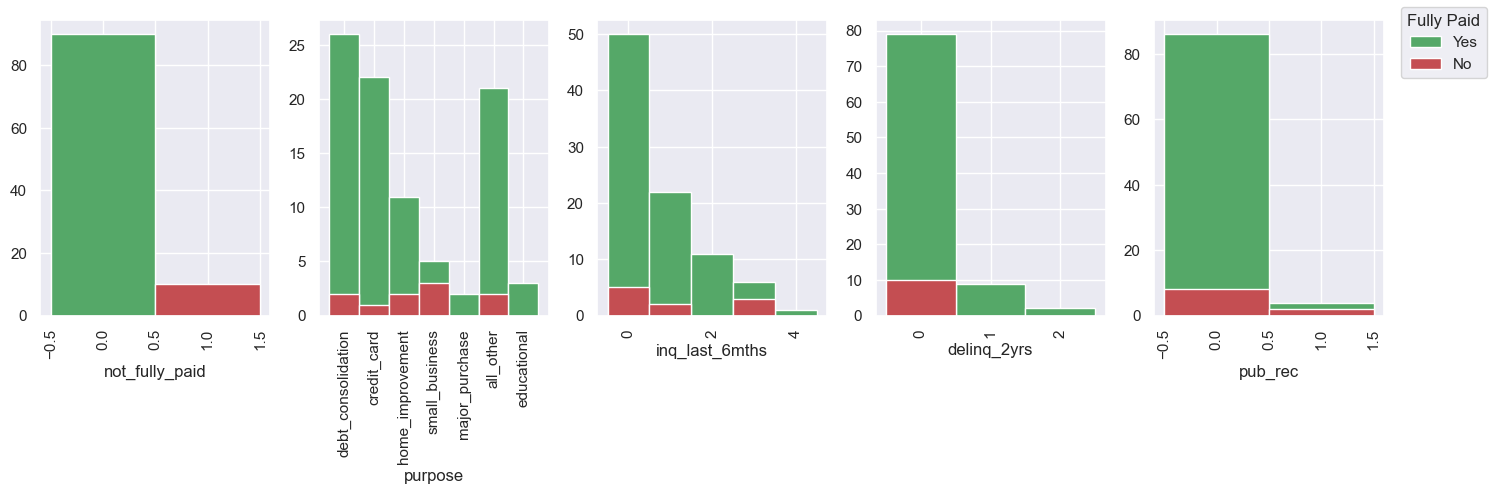

In [17]:
# Define columns to plot
columns = df_cat.columns

# Define colour palette
palette = {False: 'g', True: 'r'}

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5), sharey=False)

# Plot each histogram
for ax, col in zip(axes, columns):
    # Plot histograms for each category in 'not_fully_paid'
    sns.histplot(data=df[df['not_fully_paid'] == False], x=col, discrete=True, kde=False, ax=ax, color='g', label='Yes', alpha=1)
    sns.histplot(data=df[df['not_fully_paid'] == True], x=col, discrete=True, kde=False, ax=ax, color='r', label='No', alpha=1)
    
    # Customize each subplot
    #ax.set_title(f'Histogram of {col}') 
    ax.set_xlabel(col)
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels if needed

# Add a single legend
handles, labels = axes[0].get_legend_handles_labels()  # Use handles from the first axis
fig.legend(handles, labels, title='Fully Paid', loc='upper right')

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.94, 1])  # Adjust layout to make space for the legend
plt.show()

**Comments**

- Holding a derogatory public record increases the chances of a borrower not being able to pay a loan, but we need more data.
- Having credit inquiries in the past 6 months suggests a likelihood with not being able to pay, but again, we need more data.
- There's no direct trend between delinquencies or loan purpose (bar major and educational purposes having no unpaid loans).

The data set is too small to reasonably draw conclusions by observing the frequency of categorical factors alone. We may be able to draw more meaning from a bivariate data analysis.

#### Numerical

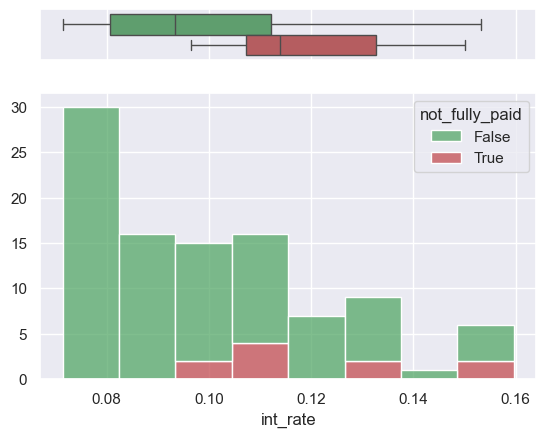

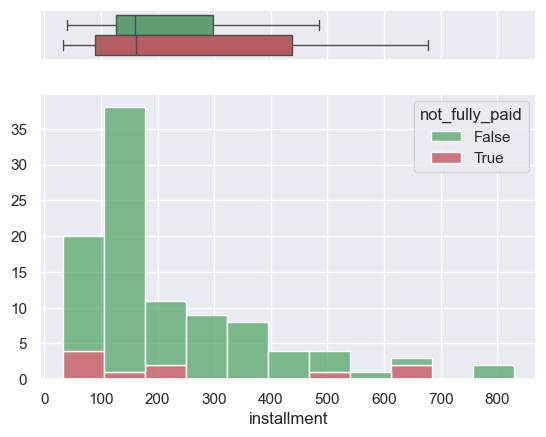

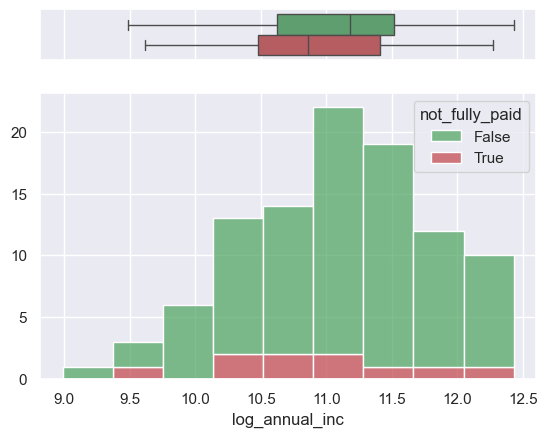

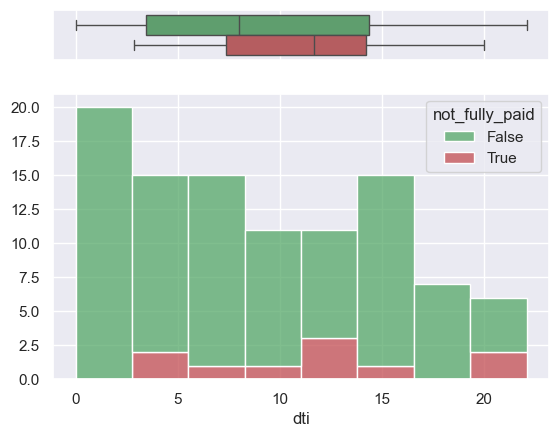

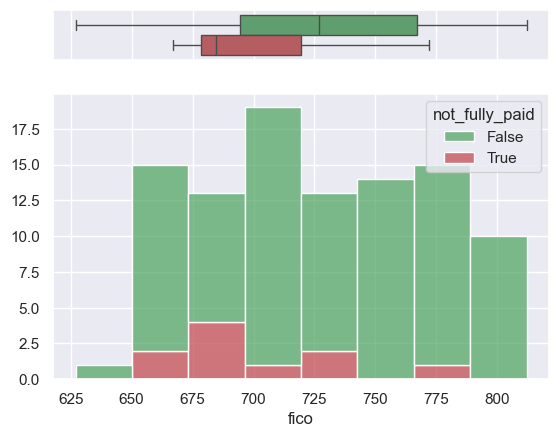

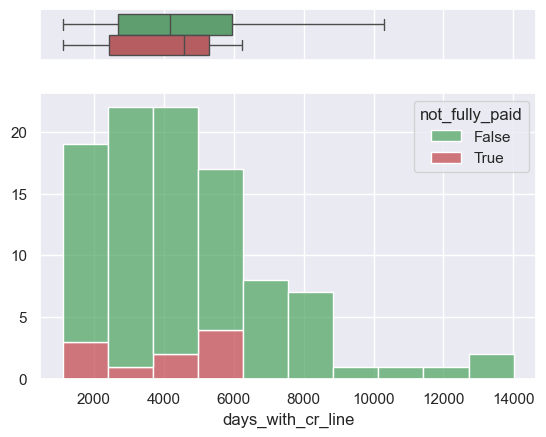

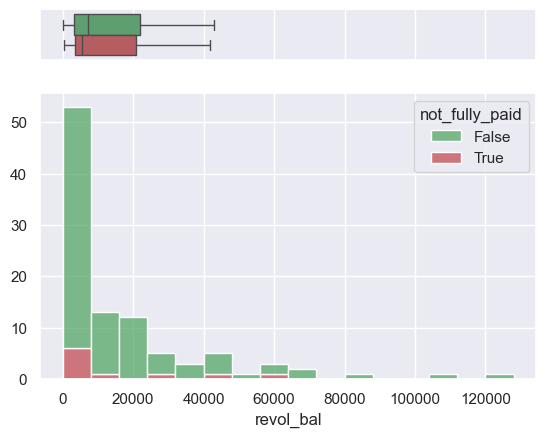

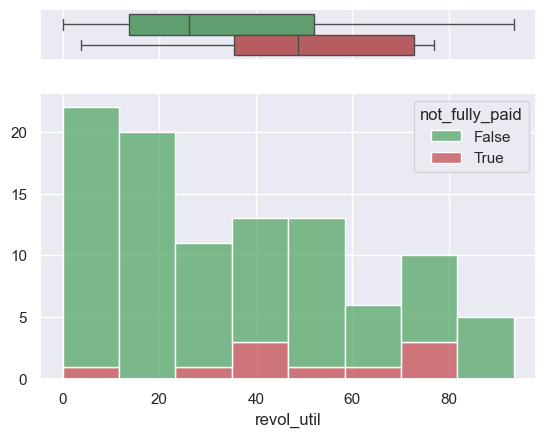

In [18]:
# Define colour palette for 'True' and 'False'
palette = {True: 'r', False: 'g'}

# Iterate only over numerical columns
for col in df.select_dtypes(include=['number']).columns:  # Ensure only numerical columns are used
    if col != 'not_fully_paid' and col not in df_cat:  # Skip the grouping column
        # Create figure and axes
        fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

        # Plot histograms and KDEs for all groups on the lower subplot
        sns.histplot(data=df, x=col, hue='not_fully_paid', multiple='stack', palette=palette, ax=ax_hist, legend=True)
        
        # Plot box plots for all groups on the upper subplot
        sns.boxplot(data=df, x=col, hue='not_fully_paid', palette=palette, ax=ax_box, showfliers=False, legend=False)

        # Set labels and title
        ax_box.set(ylabel='') #title=f'{col} - Box Plot')
        ax_hist.set_ylabel('')
        #ax_hist.set(title=f'{col} - Histogram')

        # Display the plot
        plt.show()

**Comments**

The following properties were drawn from the data distributions:

- Positive skew:
  - `int_rate`, `installment`,  `dti`, `days_with_cr_line`, `revol_bal`, `revol_util` with paid
  - `log_annual_inc`, `fico` with unpaid

- Negative skew:
  - `revo_util` with unpaid

- Wide spread:
  - `dti`, `fico` with paid 
  - `installment` with unpaid

- Narrow spread:
  - `revol_bal` was significantly tight for both paid and unpaid

The limitations include not enough data points on unpaid loans to draw a significant conclusion, despite some patterns displayed.

## Bivariate analysis

### Pair plots

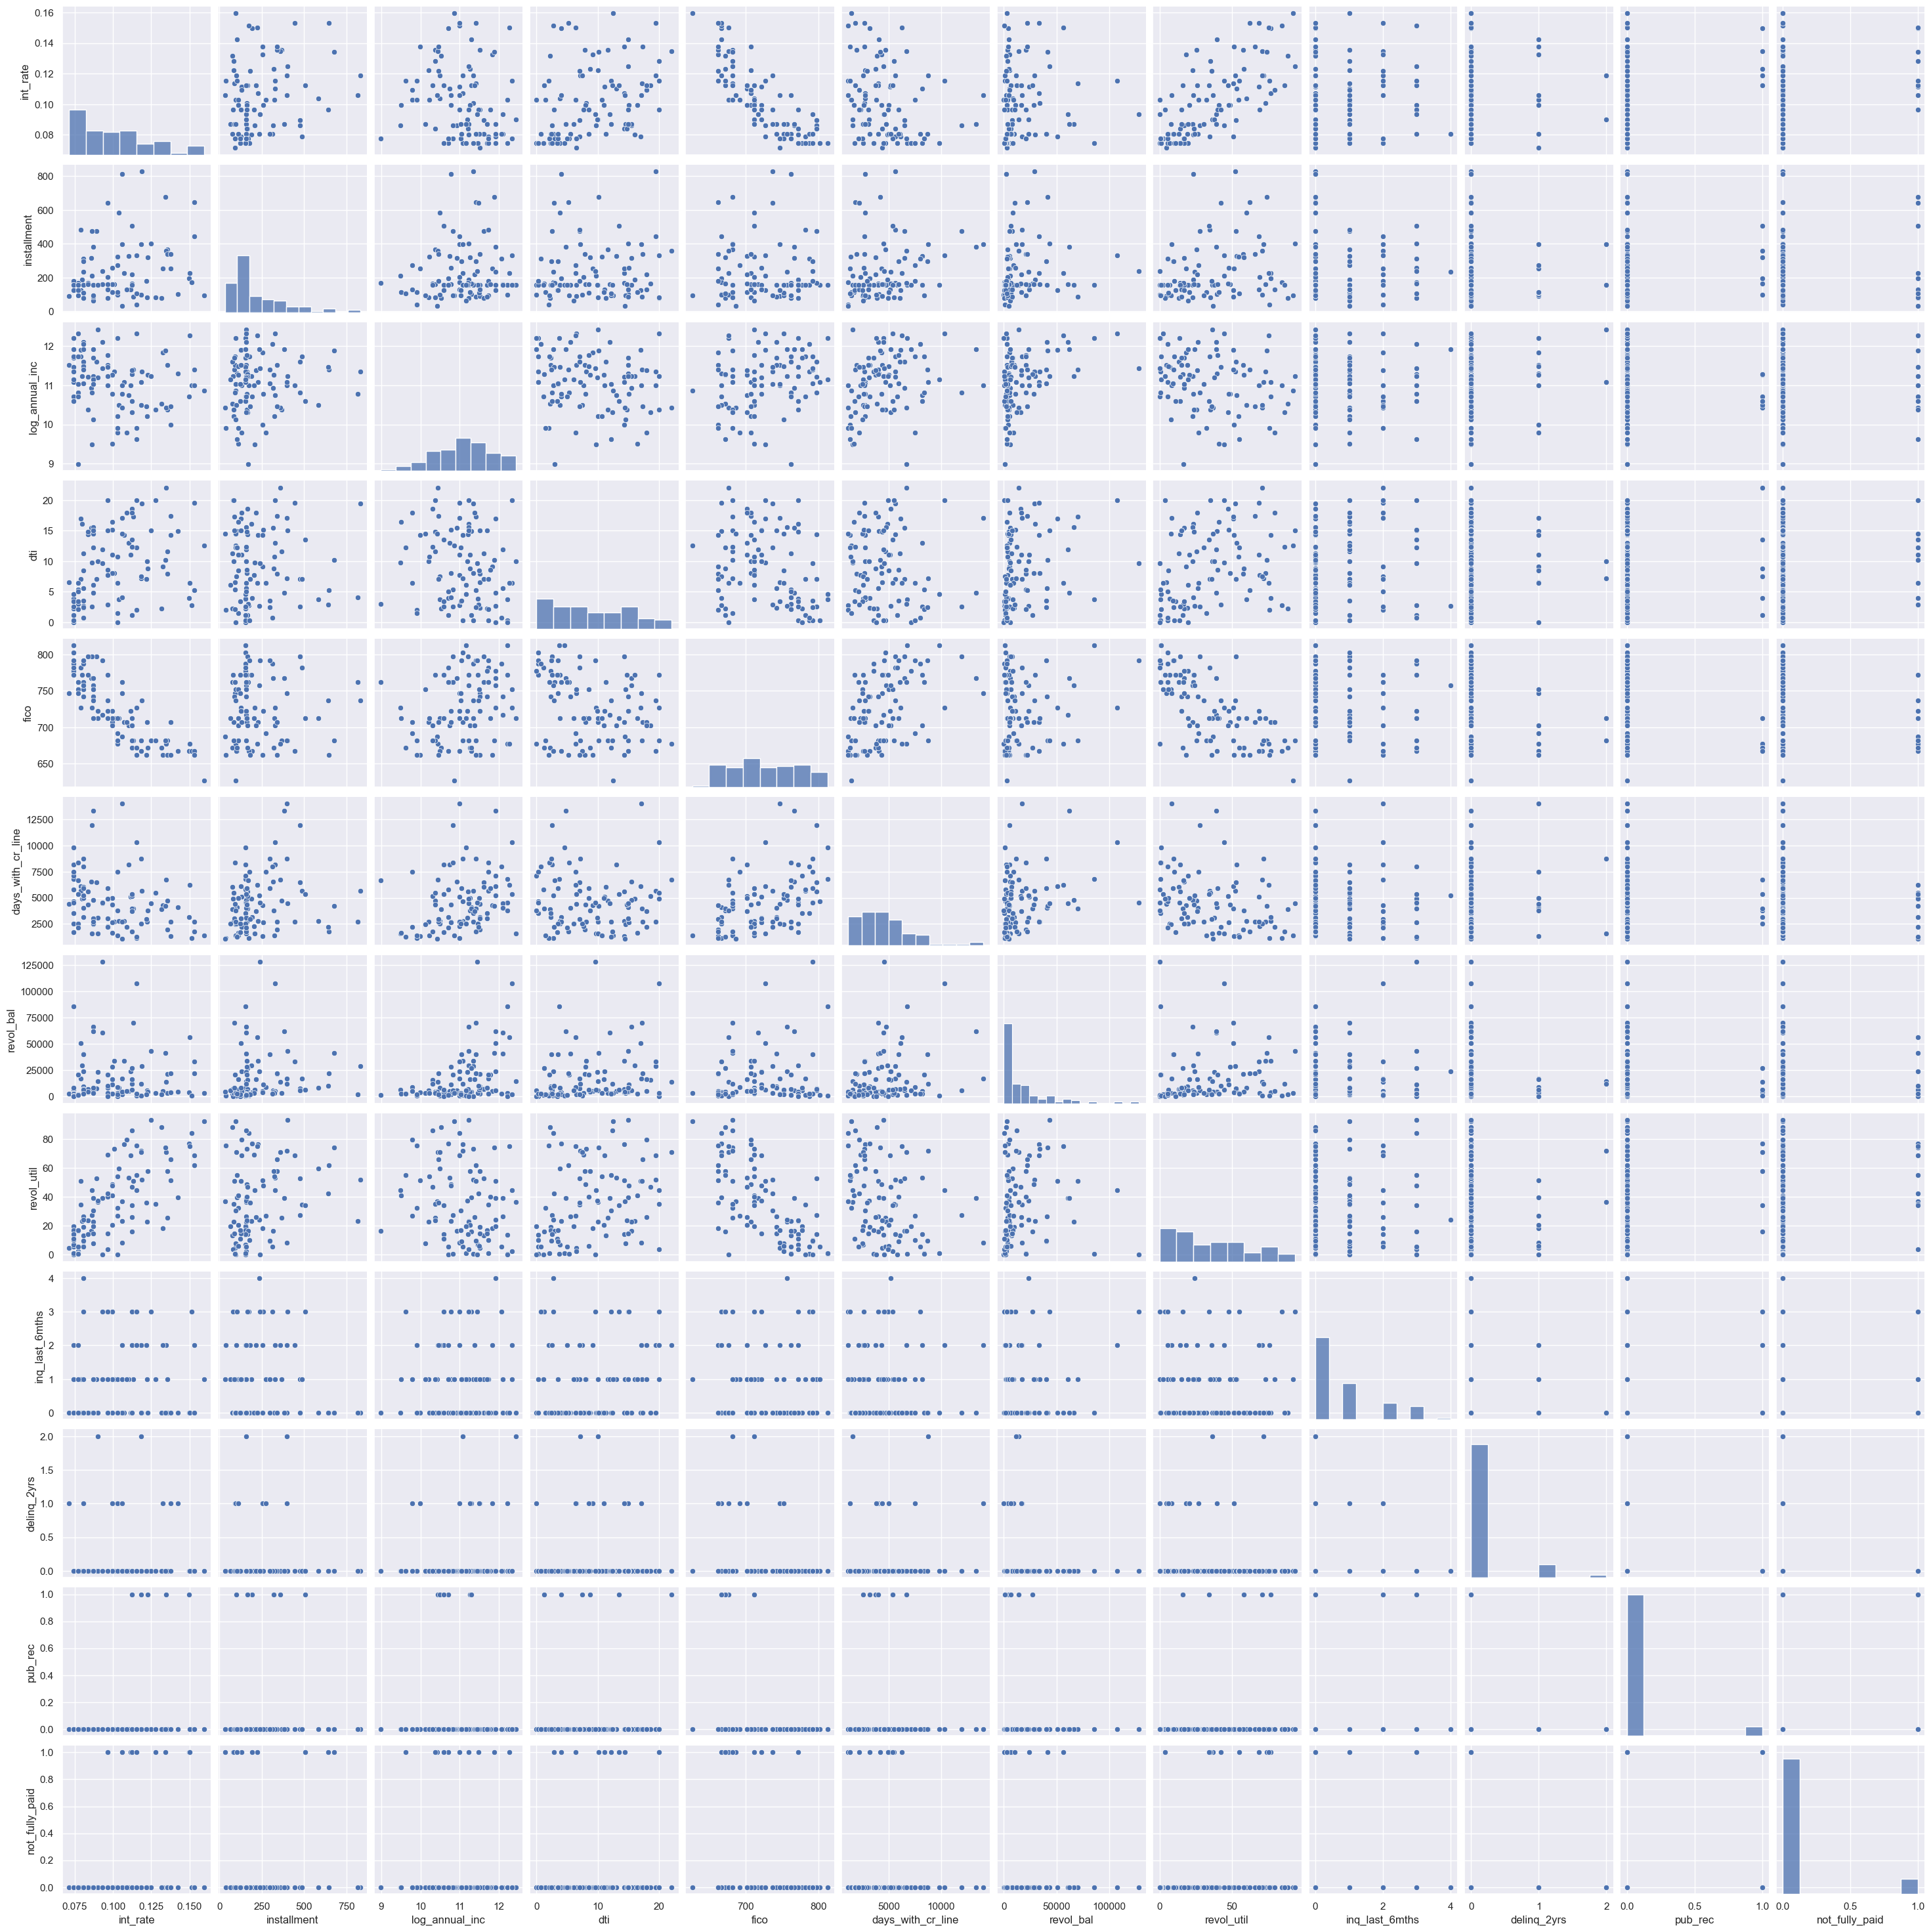

In [19]:
sns.pairplot(df)

That's a lot of figures! We only need to look at the upper triangle, as the pair plots below the distribution line are flipped.

### Heat map

A heat map is far more effective at making sense of correlations when there are many plots present.

<Axes: >

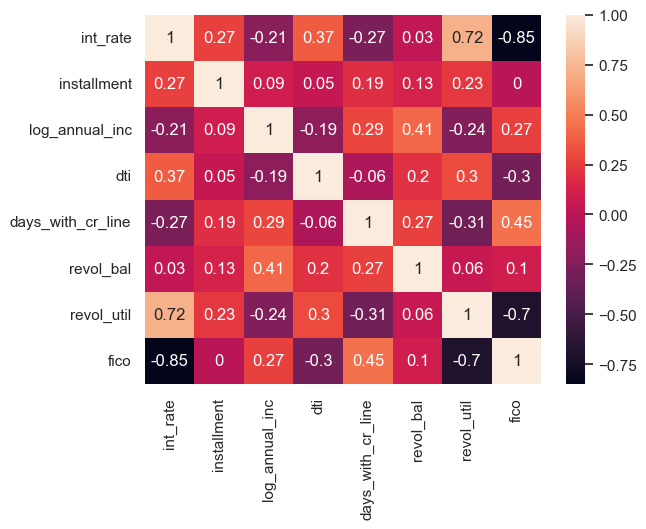

In [20]:
sns.heatmap(round(df_num.corr(),2),annot=True)

/var/folders/w0/mkf6nqcx2_s0xg85xfrzd05h0000gn/T/ipykernel_52773/3264044555.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  heatmap.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='grey', edgecolor='white', lw=0.5))


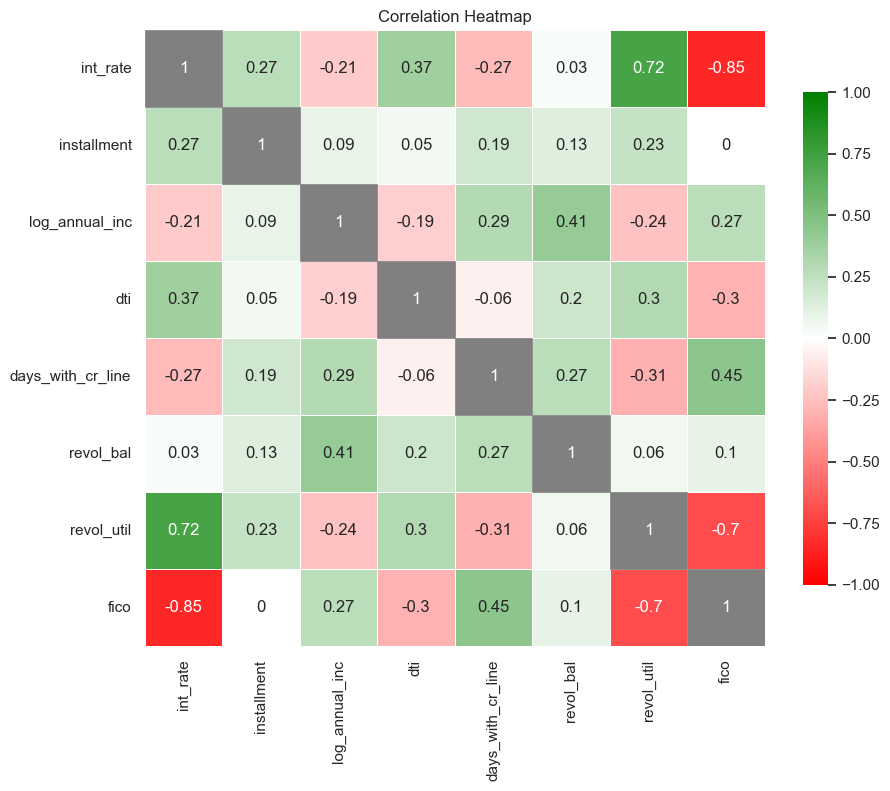

In [21]:
from matplotlib.colors import LinearSegmentedColormap

# Compute the correlation matrix and round it to 2 decimal places
corr_matrix = round(df_num.corr(), 2)

# Create a custom colormap from red to white to green
cmap = LinearSegmentedColormap.from_list('custom_cmap',
                                         ['red', 'white', 'green'],
                                         N=256)

# Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap=cmap, center=0, vmin=-1, vmax=1, 
                      linewidths=0.5, linecolor='white', cbar_kws={"shrink": .8})

# Grey out the values equal to 1
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        if corr_matrix.iloc[i, j] == 1:
            heatmap.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='grey', edgecolor='white', lw=0.5))

# Customize the heatmap
plt.title('Correlation Heatmap')
plt.show()

### Pair plots for significant correlations

To optimise our bivariate analysis, we will only look at the pair plots with a significant correlation. Let's highlight the plots with a Pearsons' Correlation Coefficient (PMC) of 0.3 or more to take a closer look.

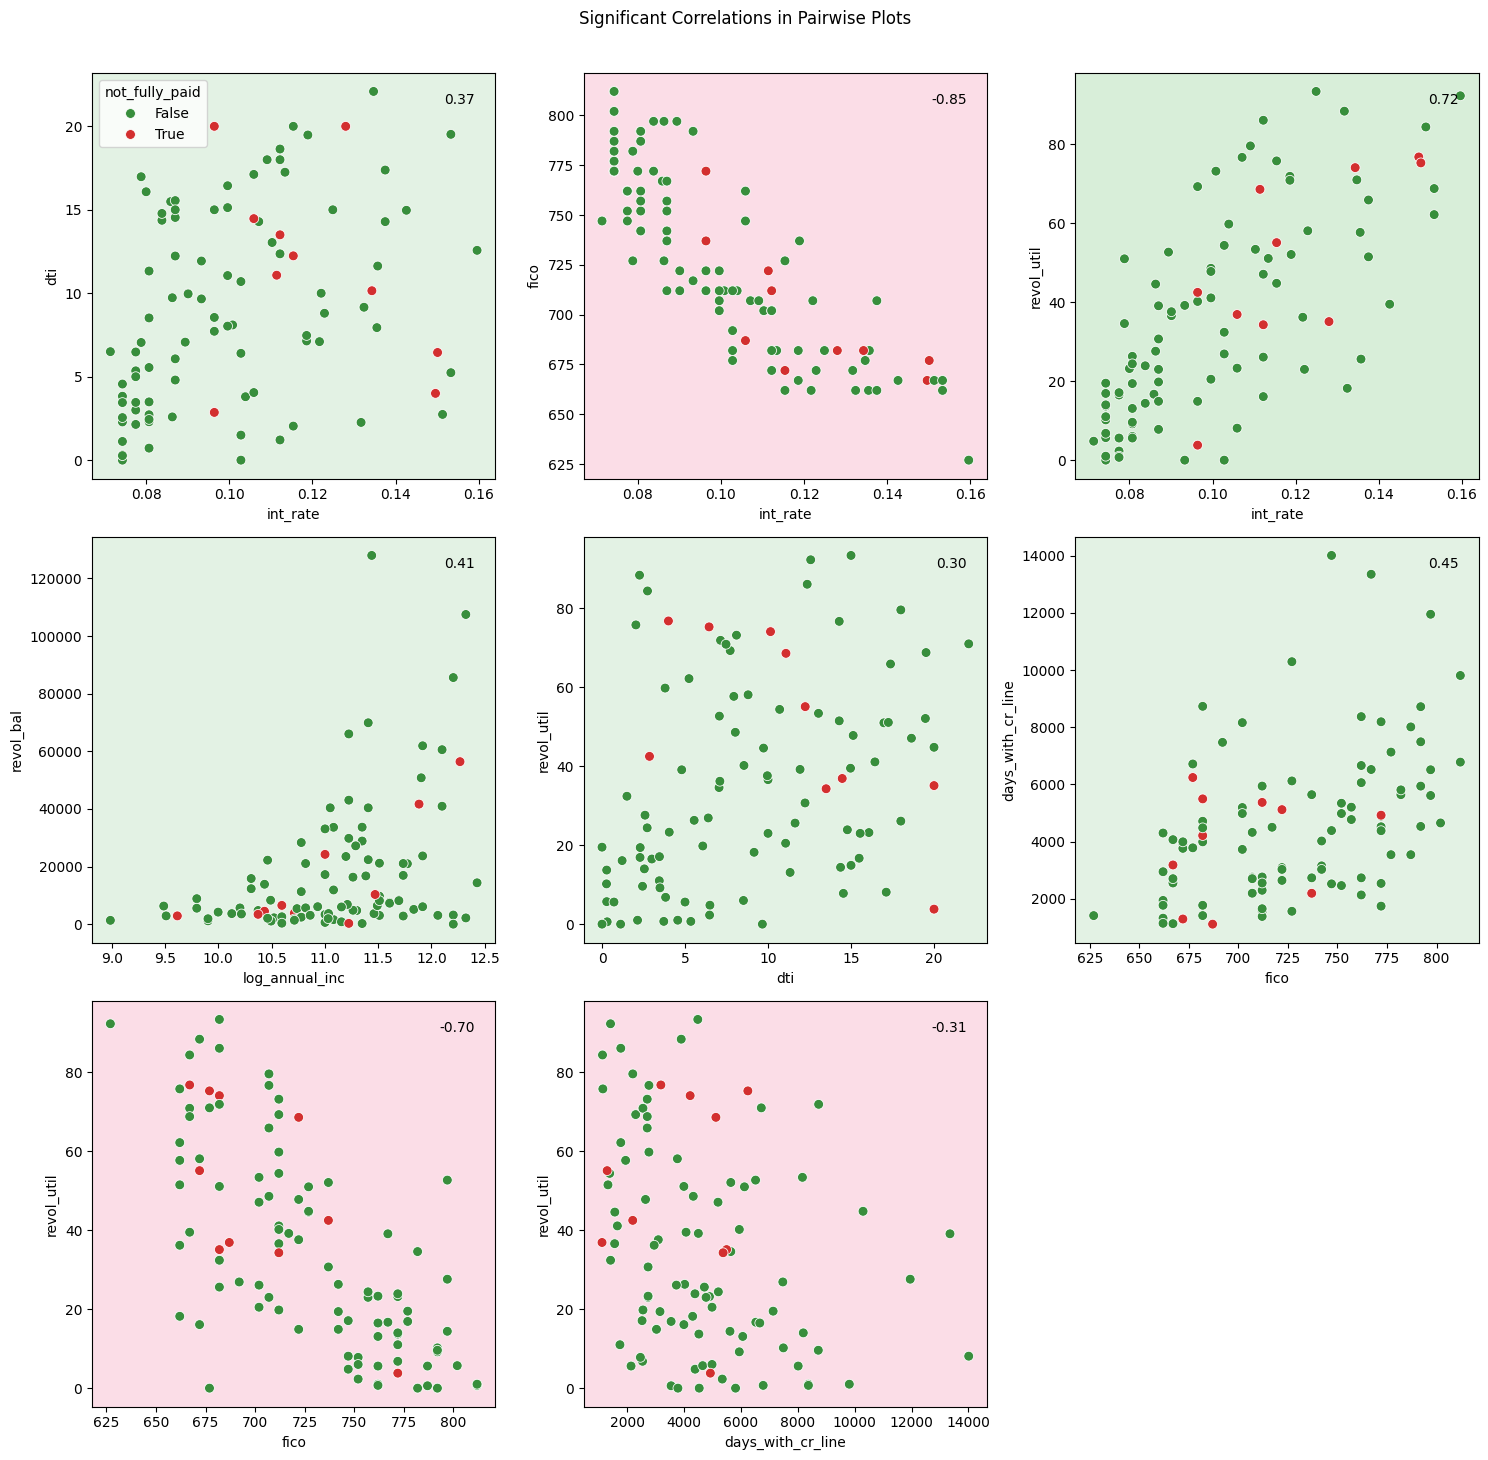

In [22]:
def get_significant_correlations(data, hue):
    # Compute the correlation matrix
    num_cols = data.select_dtypes(include=['number']).columns
    num_cols = [col for col in num_cols if col != hue]
    corr_matrix = data[num_cols].corr()

    significant_pairs = []

    # Identify significant correlations
    for i, x in enumerate(num_cols):
        for j, y in enumerate(num_cols):
            if i < j:  # Avoid redundant plotting
                corr = corr_matrix.loc[x, y]
                if abs(corr) >= 0.3:
                    significant_pairs.append((x, y, corr))

    return significant_pairs, corr_matrix

def plot_significant_correlations(data, significant_pairs, hue, palette):
    plt.style.use('default')  # Reset to default Matplotlib style

    # Define colour mapping for the dots
    dot_palette = {True: '#d32f2f', False: '#388e3c'}  # Darker red and green

    # Create a single figure to collate significant graphs
    num_plots = len(significant_pairs)
    rows = int(np.ceil(num_plots / 3))
    
    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5), sharex=False, sharey=False)
    axes = axes.flatten()

    # Plot significant correlations
    for i, (x, y, corr) in enumerate(significant_pairs):
        ax = axes[i]
        sns.scatterplot(data=data, x=x, y=y, hue=hue, palette=dot_palette, ax=ax, s=50, alpha=1.0)

        # Add correlation coefficient text
        ax.text(0.95, 0.95, f'{corr:.2f}', transform=ax.transAxes,
                ha='right', va='top', fontsize=10, color='black')

        # Set the background colour based on correlation
        if corr >= 0.5:
            ax.set_facecolor('#81c784' if corr > 0 else '#ef5350')
        elif abs(corr) >= 0.3:
            ax.set_facecolor('#a5d6a7' if corr > 0 else '#f48fb1')
        else:
            ax.set_facecolor('#c8e6c9' if corr > 0 else '#f8bbd0')

        # Ensure background colour is applied consistently
        ax.patch.set_alpha(0.3)  # Light transparency

        # Remove legend from all but the first plot
        if i != 0:
            ax.get_legend().remove()

    # Hide any unused subplots
    for ax in axes[num_plots:]:
        ax.axis('off')

    plt.suptitle('Significant Correlations in Pairwise Plots', y=0.97)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Define colour palette for 'True' and 'False'
palette = {True: '#ff9999', False: '#99ff99'}  # Pastel red and green

# Get significant correlations
significant_pairs, corr_matrix = get_significant_correlations(df, hue='not_fully_paid')

# Filter out uninformative graphs
filtered_pairs = [(x, y, corr) for x, y, corr in significant_pairs 
                  if len(df[x].unique()) > 10 and len(df[y].unique()) > 10]

# Plot the significant correlations
plot_significant_correlations(df, filtered_pairs, hue='not_fully_paid', palette=palette)

The darker the shade, the stronger the correlation. Paid loans are indicated by green data points, unpaid in red.

Let's look at how each loan with a given `purpose` faired, for relationships with a PMC >= 0.3.

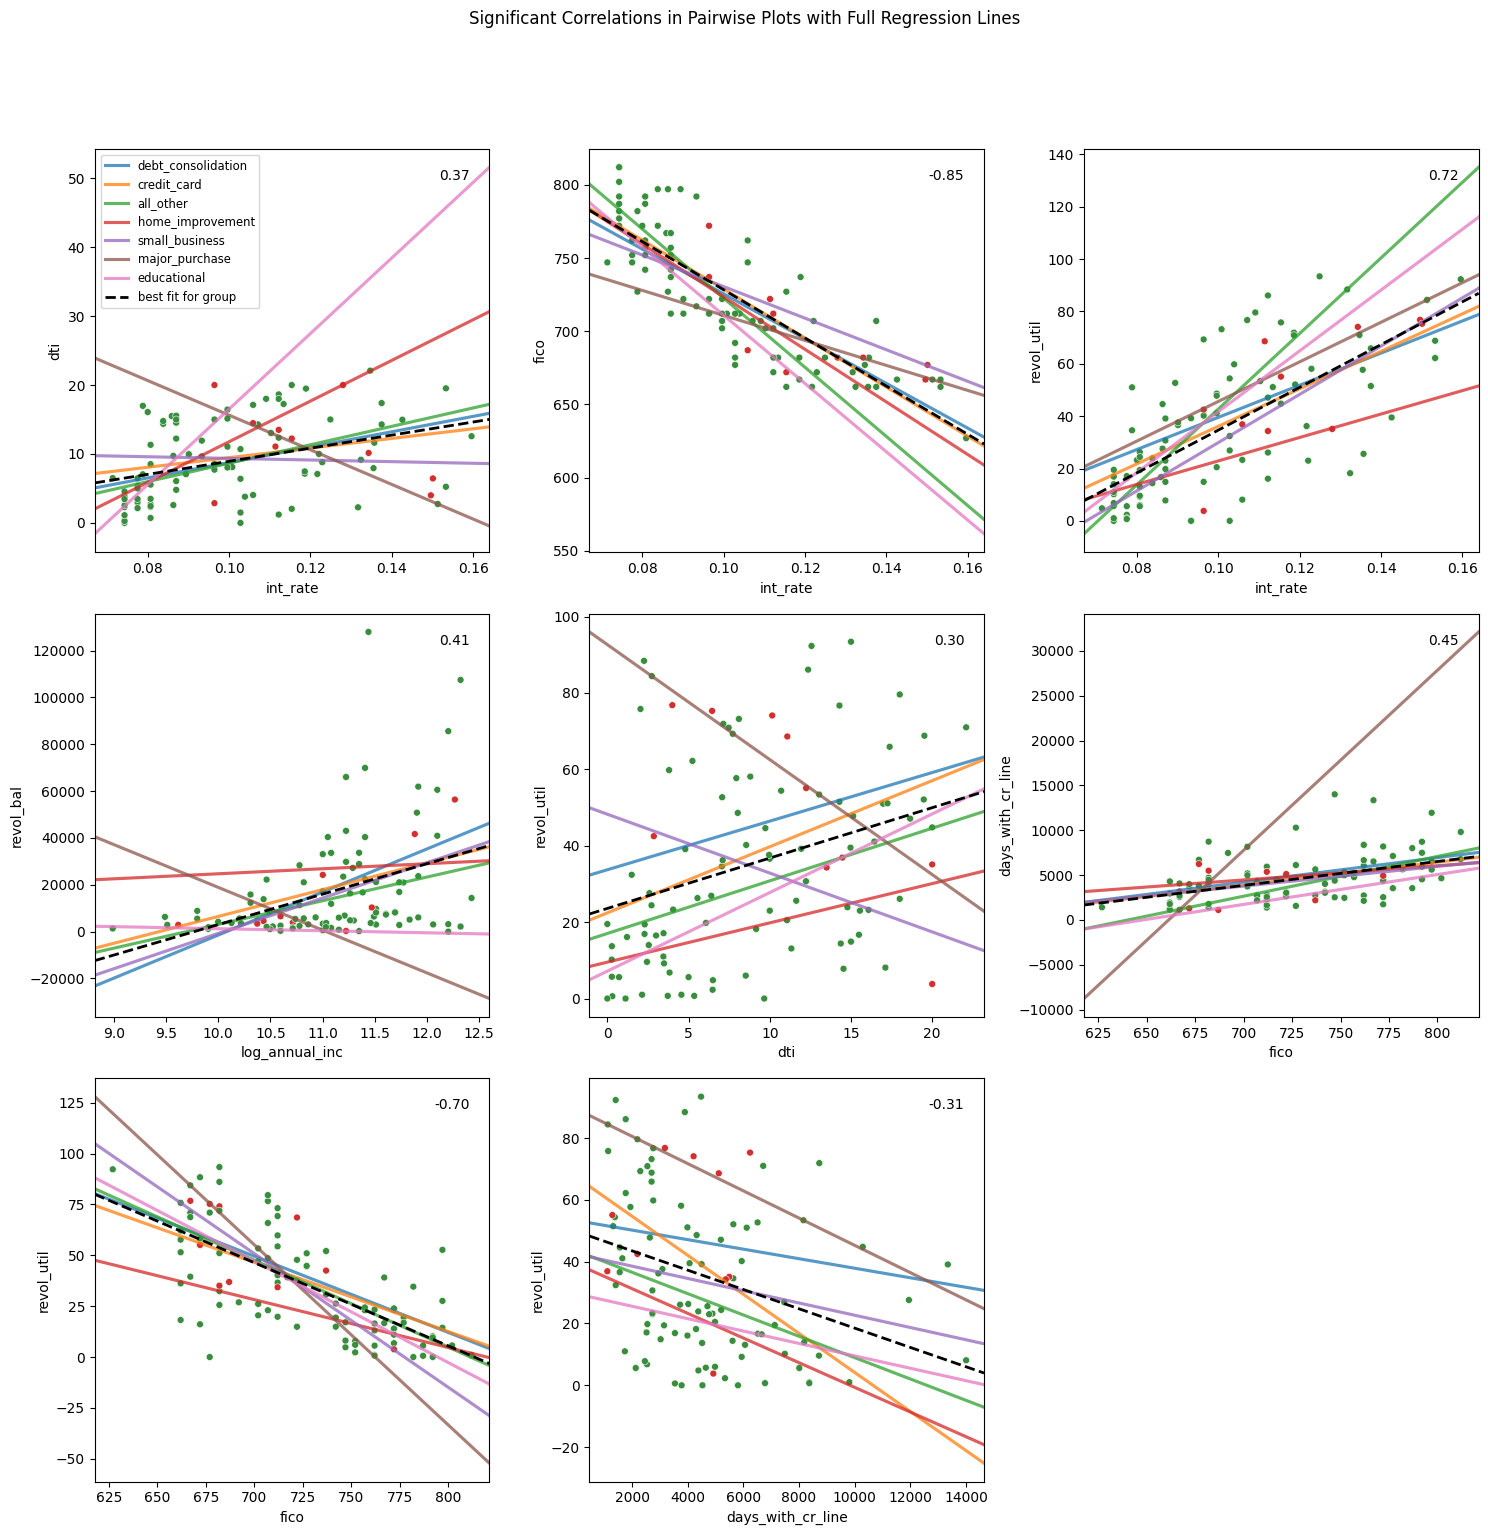

In [25]:
def plot_significant_correlations_with_full_regression(data, significant_pairs, hue, palette):
    plt.style.use('default')  # Reset to default Matplotlib style

    # Define color mapping for the dots
    dot_palette = {True: '#d32f2f', False: '#388e3c'}  # Darker red and green
    purpose_palette = sns.color_palette('tab10', n_colors=len(data['purpose'].unique()))

    # Create a single figure to collate significant graphs
    num_plots = len([pair for pair in significant_pairs if abs(pair[2]) >= 0.3])
    rows = int(np.ceil(num_plots / 3))

    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5), sharex=False, sharey=False)
    axes = axes.flatten()

    plot_index = 0
    added_legend = False

    # Plot significant correlations with regression lines for abs(corr) >= 0.3
    for x, y, corr in significant_pairs:
        if abs(corr) >= 0.3:
            ax = axes[plot_index]
            sns.scatterplot(data=data, x=x, y=y, hue=hue, palette=dot_palette, ax=ax, s=25, alpha=1.0, legend=False)

            unique_purposes = data['purpose'].unique()
            for idx, purpose in enumerate(unique_purposes):
                subset = data[data['purpose'] == purpose]
                sns.regplot(x=subset[x], y=subset[y], ax=ax, scatter=False, label=purpose, ci=None, truncate=False, 
                            color=purpose_palette[idx], line_kws={'alpha': 0.75})

            # Add the overall regression line in bold black
            sns.regplot(data=data, x=x, y=y, ax=ax, scatter=False, ci=None, truncate=False, color='black', line_kws={'linewidth': 2,  'linestyle': '--'}, label='best fit for group')

            if not added_legend:
                ax.legend(loc='best', fontsize='small')
                added_legend = True

            # Add correlation coefficient text
            ax.text(0.95, 0.95, f'{corr:.2f}', transform=ax.transAxes,
                    ha='right', va='top', fontsize=10, color='black')

            plot_index += 1

    # Hide any unused subplots
    for ax in axes[plot_index:]:
        ax.axis('off')

    plt.suptitle('Significant Correlations in Pairwise Plots with Full Regression Lines', y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Use the new function to plot significant correlations with full regression lines
plot_significant_correlations_with_full_regression(df, filtered_pairs, hue='not_fully_paid', palette=palette)


**Comments**

Correlation was found to be
- `dti`, `int_rate`: mostly positive, negative `small_business` and `major_purchase` 
- `fico`, `int_rate`: all negative with `educational` being the strongest, and `major_purchase` the weakest
- `revol_util`, `int_rate`: all positive with `all_other` and `small_business` the strongest and `home_improvement` the weakest
- `revol_bal`, `log_annual_inc`: mostly positive, negative for `educational` (weak) and `major_purchase` (strong)
- `revol_util`, `dti`: mostly positive, negative `small_business` (weak) and `major_purchase` (strong)
- `days_with_cr_line`, `fico`: all positive with `major_purchase` being exceptionally strong (almost 1.0)
- `revol_util`, `fico`: all negative, `home_improvement` weakest, `major_purchase` strongest
- `revol_util`, `days_with_cr_line`: all negative with `credit_card` strongest, `debt_consolidation` weakest

These abnormalities give us a clue for further investigation. However, we need to make sure the results aren't due to a lack of data points.

We may gather more meaningful insights by assessing the trend line between `not_fully_paid` outcomes:

ValueError: The palette dictionary is missing keys: {np.False_, np.True_}

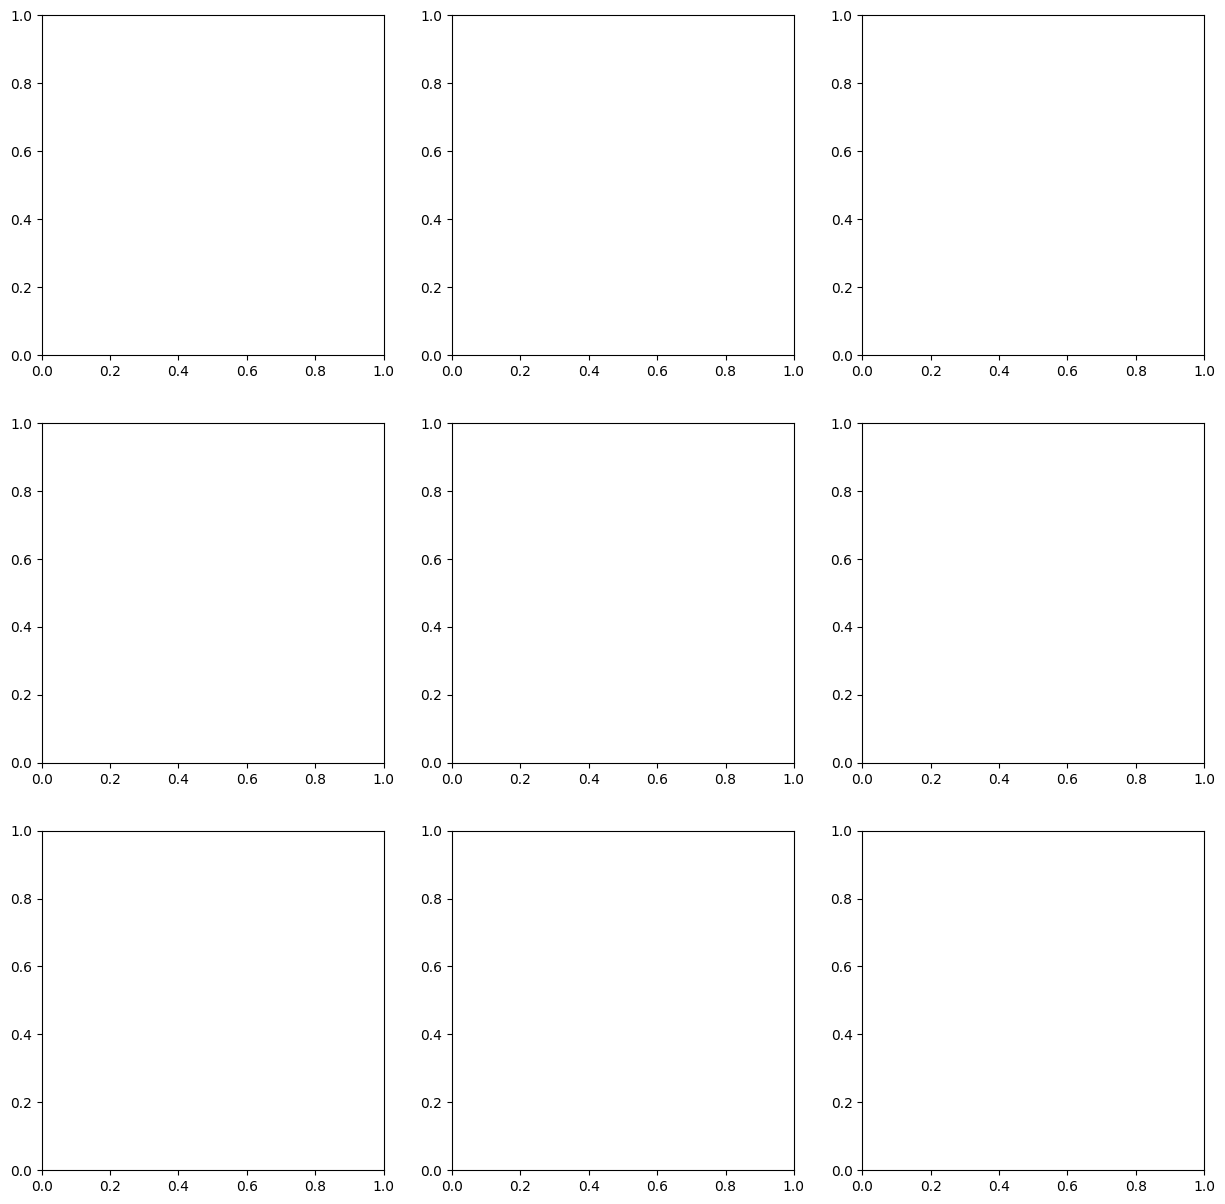

In [24]:
def plot_significant_correlations_with_full_regression(data, significant_pairs, hue, palette):
    plt.style.use('default')  # Reset to default Matplotlib style

    # Define color mapping for the hue categories
    hue_palette = palette if palette else sns.color_palette('tab10', n_colors=len(data[hue].unique()))

    # Create a single figure to collate significant graphs
    num_plots = len([pair for pair in significant_pairs if abs(pair[2]) >= 0.3])
    rows = int(np.ceil(num_plots / 3))

    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5), sharex=False, sharey=False)
    axes = axes.flatten()

    plot_index = 0
    added_legend = False

    # Plot significant correlations with regression lines for abs(corr) >= 0.3
    for x, y, corr in significant_pairs:
        if abs(corr) >= 0.3:
            ax = axes[plot_index]
            sns.scatterplot(data=data, x=x, y=y, hue=hue, palette=hue_palette, ax=ax, s=25, alpha=0.7, legend=False)

            unique_categories = data[hue].unique()
            for category in unique_categories:
                subset = data[data[hue] == category]
                sns.regplot(x=subset[x], y=subset[y], ax=ax, scatter=False, label=category, ci=None, truncate=False, 
                            color=hue_palette[unique_categories.tolist().index(category)], line_kws={'alpha': 0.75})

            # Add the overall regression line in bold black
            sns.regplot(data=data, x=x, y=y, ax=ax, scatter=False, ci=None, truncate=False, color='black', line_kws={'linewidth': 2, 'linestyle': '--'}, label='Best Fit for All')

            if not added_legend:
                ax.legend(loc='best', fontsize='small')
                added_legend = True

            # Add correlation coefficient text
            ax.text(0.95, 0.95, f'{corr:.2f}', transform=ax.transAxes,
                    ha='right', va='top', fontsize=10, color='black')

            plot_index += 1

    # Hide any unused subplots
    for ax in axes[plot_index:]:
        ax.axis('off')

    plt.suptitle('Significant Correlations with Regression Lines', y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example usage of the function
plot_significant_correlations_with_full_regression(df, filtered_pairs, hue='not_fully_paid', palette={'Paid': 'green', 'Not Fully Paid': 'red'})

## Insights

### Contextualising the findings

The aim is to minimise the target variable, `not_fully_paid` outcomes, on a loan.

One way to make use of this dataset is to define a **borrower** by
- The `log_annual_inc`, their `dti` and a weight given by their `fico` credit score
- We could use use the additional properties to further distinguish them: `days_with_cr_line`, `revol_bal`, `revol_util`, `inq_last_6mths`, `delinq_2yrs`, `pub_rec`

We could define a **loan** by the following
- `purpose`, `int_rate` and `installment`
- The properties `int_rate` and `installment` are **control variables** that can be adjusted to optimise our target variable

### Results discussion

#### Sample size

Of 100 loan outcomes surveyed, approximately 10 were unpaid. The data set is small, having an even smaller subset for the target data points. An obvious suggestion would be to use more data points, particularly since univariate analysis on such as small sample size can yield unreliable results. A larger figure such as 1000 loans would be a better number, using the framework developed here to analyse the new amount.

Since the proportion of failed payments is much smaller than that of the paid loans, we could look at the problem from a different perspective, analysing what contributes to a loan being paid off successfuly. We could then profile the failed payment loans onto this analysis, and comment on the cases where these cases differ.

#### Statistics

The large discrepencies between the upper quartile and max values in some columns were most likely due to the data set being too small.

#### Defaulting factors

The following factors contributed to a borrower not being able to pay a loan:
- Holding a derogatory public record
- Having credit enquiries within the last 6 months

There was no direct trend observed for delinquencies or the purpose of a loan, however it is important to note that all educational and major purchase loans were fully paid in this occasion.

#### Data distribution


The interest rates, installment frequency, DTI, duraction of credit line, amount of credit avaliable and utilised credit had a positive skew. This indicated the majority of loans that were paid off had these properties minimised. The annual income and FICO credit score of a borrower displayed a negative skew. This indicates that a higher annual income and credit score correlates with a loan being paid off, which is common sense.

The higher the interest rate, the less likely it was that a loan could be paid off.

Patterns in the unpaid loans







**Data distribution**
The interest rates, installment frequency, DTI, the duration of credit line, size of credit avaliable to a buyer and the amount of credit they utilised all had a positive skew, indicating a lower mean value for paid loans. 

The annual income and FICO credit score of a borrower displayed a negative skew. This indicates that borrowers handling larger amounts of money must be trusted less. Was there a correlation between FICO and annual income?


**Comments**

The following properties were drawn from the data distributions:

- Positive skew:
  - `int_rate`, `installment`,  `dti`, `days_with_cr_line`, `revol_bal`, `revol_util` with paid
  - `log_annual_inc`, `fico` with unpaid

- Negative skew:
  - `revo_util` with unpaid

- Wide spread:
  - `dti`, `fico` with paid 
  - `installment` with unpaid

- Narrow spread:
  - `revol_bal` was significantly tight for both paid and unpaid

The limitations include not enough data points on unpaid loans to draw a significant conclusion, despite some patterns displayed.